In [4]:
# import necessary modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
import math

In [5]:
############################################
#
# Varying parameter (others fixed to default)
#
var_name = 'm_ncdm'
var_min = 1.e-10
var_max = var_min + 0.08
var_num = 5
var_legend = r'$\sum m_\nu$'
var_figname = 'mnu'
#
# Instead of ficing h=0.67556, we will fix here theta_s.
# For the reference LambdaCDM model we get 100*theta_s = 1.042167.
# We will impose this for whatever mass (then CLASS adjusts h automatically)
#
#############################################
#
# Fixed settings
#
common_settings = {'output':'tCl,pCl,lCl,mPk',
                   'lensing':'yes',
                   # LambdaCDM parameters
                   #'100*theta_s':1.042167,
                   'omega_b':0.022032,
                   #'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'n_s':0.9619,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   # other output and precision parameters
                   'N_ncdm':1,
                   'deg_ncdm':3.,
                   'N_ur':0.00641,
                   'P_k_max_1/Mpc':3.0,
                   'l_switch_limber':9}
                   #'background_verbose':1} 

#    
slightly_better_precision_settings = {
                                    'tol_thermo_integration':1.e-5,
                                    'tol_perturb_integration':1.e-6,
                                    'l_logstep':1.026,
                                    'l_linstep':25,
                                    'hyper_flat_approximation_nu':7000.,
                                    'transfer_neglect_delta_k_S_t0':0.17,
                                    'transfer_neglect_delta_k_S_t1':0.05,
                                    'transfer_neglect_delta_k_S_t2':0.17,
                                    'transfer_neglect_delta_k_S_e':0.13,
                                    'delta_l_max':1000,
                                    }
#    
much_better_precision_settings = {
                            'recfast_Nz0':100000,
                            'tol_thermo_integration':1.e-5,
                            'recfast_x_He0_trigger_delta':0.01,
                            'recfast_x_H0_trigger_delta':0.01,
                            'evolver':0,
                            'k_min_tau0':0.002,
                            'k_max_tau0_over_l_max':3.,
                            'k_step_sub':0.015,
                            'k_step_super':0.0001,
                            'k_step_super_reduction':0.1,
                            'start_small_k_at_tau_c_over_tau_h': 0.0004,
                            'start_large_k_at_tau_h_over_tau_k': 0.05,
                            'tight_coupling_trigger_tau_c_over_tau_h':0.005,
                            'tight_coupling_trigger_tau_c_over_tau_k':0.008,
                            'start_sources_at_tau_c_over_tau_h': 0.006,
                            'l_max_g':50,
                            'l_max_pol_g':25,
                            'l_max_ur':50,
                            'tol_perturb_integration':1.e-6,
                            'perturb_sampling_stepsize':0.01,
                            'radiation_streaming_approximation':2,
                            'radiation_streaming_trigger_tau_over_tau_k':240.,
                            'radiation_streaming_trigger_tau_c_over_tau':100.,
                            'ur_fluid_approximation':2,
                            'ur_fluid_trigger_tau_over_tau_k':50.,
                            'l_logstep':1.026,
                            'l_linstep':25,
                            'hyper_sampling_flat':12.,
                            'hyper_nu_sampling_step':10.,
                            'hyper_phi_min_abs':1.e-10,
                            'hyper_x_tol':1.e-4,
                            'hyper_flat_approximation_nu':1.e6,
                            'q_linstep':0.20,
                            'q_logstep_spline':20.,
                            'q_logstep_trapzd':0.5,
                            'q_numstep_transition':250,
                            'transfer_neglect_delta_k_S_t0':0.17,
                            'transfer_neglect_delta_k_S_t1':0.05,
                            'transfer_neglect_delta_k_S_t2':0.17,
                            'transfer_neglect_delta_k_S_e':0.13,
                            'neglect_CMB_sources_below_visibility':1.e-30,
                            'transfer_neglect_late_source':3000.,
                            'l_switch_limber':40.,
                            'accurate_lensing':1,
                            'num_mu_minus_lmax':1000.,
                            'delta_l_max':1000.,
                            } 
#
sligthly_better_precision_ncdm = {
                        'tol_ncdm_bg':1.e-10,
                        #'l_max_ncdm':50,
                        'ncdm_fluid_approximation':3,
                        'ncdm_fluid_trigger_tau_over_tau_k':51.,
                        'tol_ncdm_synchronous':1.e-10,
                                }
#
much_better_precision_ncdm = {
                            'tol_ncdm_bg':1.e-10,
                            'l_max_ncdm':50,
                            'ncdm_fluid_approximation':3,
                            'ncdm_fluid_trigger_tau_over_tau_k':51.,
                            'tol_ncdm_synchronous':1.e-10,
                            }

In [6]:
#
# loop over varying parameter values
#
M = {}
h=[]
omega_nu=[]
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #    
    # call CLASS
    #
    M[i] = Class()
    M[i].set(common_settings)
    #M[i].set(slightly_better_precision_settings)
    #M[i].set(much_better_precision_settings)
    #M[i].set(sligthly_better_precision_ncdm)
    #M[i].set(much_better_precision_ncdm)
    M[i].set({var_name:var})
    M[i].set({'omega_cdm':0.12038,'100*theta_s':1.042167})
    M[i].compute()
    derived = M[i].get_current_derived_parameters(['z_reio','z_rec'])
    #print 'z_reio = ',derived['z_reio']
    #print 'z_rec = ',derived['z_rec']
    #print 'z_eq = ',(M[i].Omega_m()/M[i].Omega_r())
    #print 'Omega_Lambda = ',(M[i].Omega_Lambda())
    print ('h = ',M[i].h())
    print ('omega_nu = ',(M[i].Omega_nu*M[i].h()*M[i].h()))
    h.append(M[i].h())
    omega_nu.append(M[i].Omega_nu*M[i].h()*M[i].h())

h =  0.6755299299913973
omega_nu =  1.7071326916207897e-05
h =  0.6710272526633712
omega_nu =  0.0006444632174695544
h =  0.6656135346683545
omega_nu =  0.0012884846370820732
h =  0.6601299040097961
omega_nu =  0.001932604174322849
h =  0.654680606328544
omega_nu =  0.0025767482616871323


In [7]:
#print omega_nu
#
# loop over varying parameter values
#
M_bis = {}
h_bis=[]
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    #
    #    
    # call CLASS
    #
    M_bis[i] = Class()
    M_bis[i].set(common_settings)
    #M_bis[i].set(slightly_better_precision_settings)
    #M_bis[i].set(much_better_precision_settings)
    #M_bis[i].set(sligthly_better_precision_ncdm)
    #M_bis[i].set(much_better_precision_ncdm)
    M_bis[i].set({var_name:var})
    M_bis[i].set({'omega_cdm':(0.12038-omega_nu[i]),'h':h[0]})
    M_bis[i].compute()
    derived_bis = M_bis[i].get_current_derived_parameters(['z_reio','z_rec'])
    #print 'z_reio = ',derived_bis['z_reio']
    #print 'z_rec = ',derived_bis['z_rec']
    #print 'z_eq = ',(M_bis[i].Omega_m()/M_bis[i].Omega_r())
    #print 'Omega_Lambda = ',(M_bis[i].Omega_Lambda())
    print ('h = ',M_bis[i].h())
    h_bis.append(M_bis[i].h())

h =  0.6755299299913973
h =  0.6755299299913973
h =  0.6755299299913973
h =  0.6755299299913973
h =  0.6755299299913973


In [8]:
# esthetic definitions for the plots
#font = {'size'   : 24, 'family':'STIXGeneral'}
#axislabelfontsize='large'
#matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
#plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.style.use('../plot-style-triangle.txt')

Duplicate key in file '../plot-style-triangle.txt', line 65 ('axes.labelpad : 0.0')
Duplicate key in file '../plot-style-triangle.txt', line 71 ('axes.linewidth: 0.5')
/var/folders/51/zjj7khxd3q7ffz_pd1kp_3p00000gn/T/ipykernel_23668/1070698508.py:7: UserWarning: Style includes a parameter, 'figure.max_open_warning', that is not related to style.  Ignoring this parameter.
  plt.style.use('../plot-style-triangle.txt')


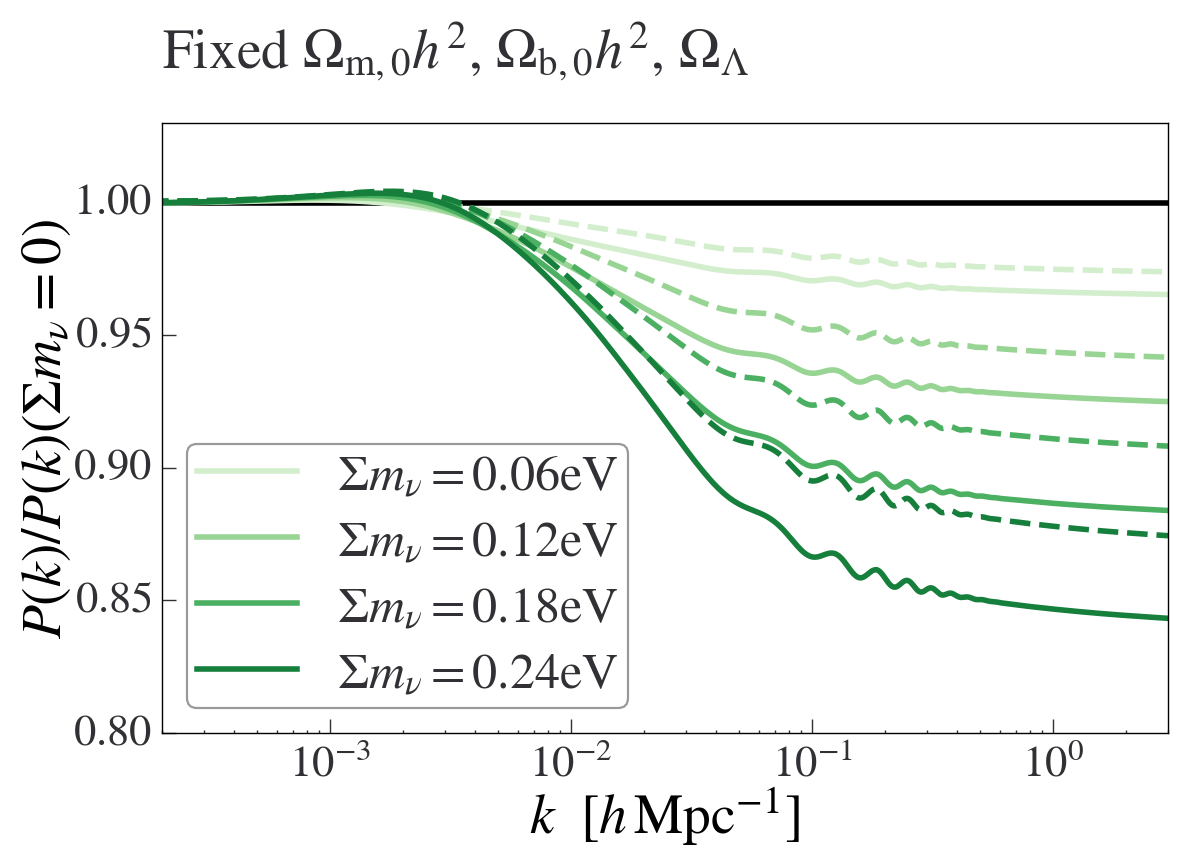

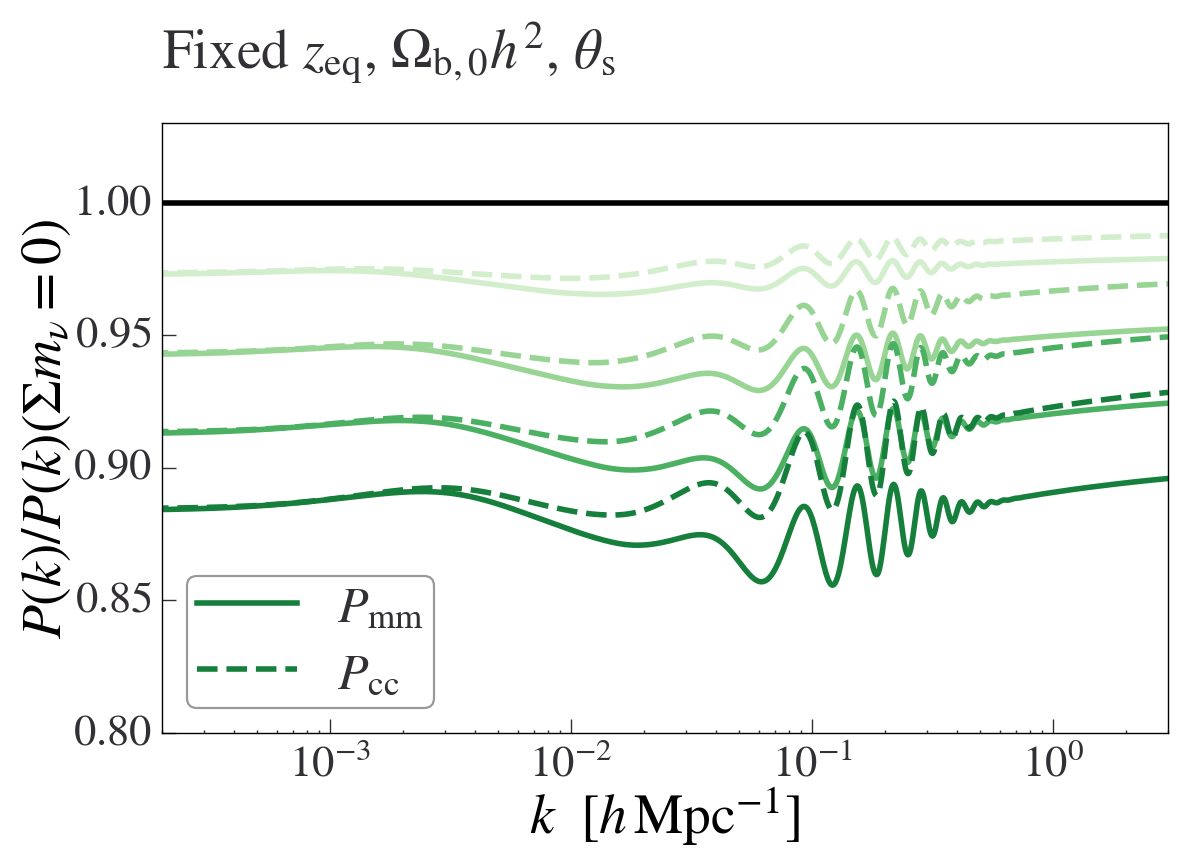

In [9]:
#h = [0.6755154, 0.6537643, 0.6320286, 0.6119767, 0.5935057]
#print h
#print h[0]
#############################################
#
# arrays for output
#
kvec = np.logspace(-4,np.log10(3),1000)
twopi = 2.*math.pi
#
# Create figures
#
fig_Pk, ax_Pk = plt.subplots()
fig_Pk2, ax_Pk2 = plt.subplots()
#fig_TT, ax_TT = plt.subplots()
#
# loop over varying parameter values
#
#ll = {}
#clM = {}
#clTT = {}
#clM_unlensed = {}
#clTT_unlensed = {}
pkM = {}
pkM_cb = {}
#clM_bis = {}
#clTT_bis = {}
#clM_unlensed_bis = {}
#clTT_unlensed_bis = {}
pkM_bis = {}
pkM_bis_cb = {}
legarray = []
#
for i in range(var_num):
    #
    # deal with varying parameters:
    #
    var = var_min + (var_max-var_min)*i/(var_num-1.)
    #
    #
    # deal with colors and legends
    #
    if i == 0:
        var_color = 'k'
        var_alpha = 1.
    else:
        #var_color = 'r'
        #var_alpha = 1.*i/(var_num-1.)
        var_color = plt.cm.Greens(0.8*i/(var_num-1))
    #
    # get Cls
    #
    #clM[i] = M[i].lensed_cl(2500)
    #ll[i] = clM[i]['ell'][2:]
    #clTT[i] = clM[i]['tt'][2:]
    #clM_unlensed[i] = M[i].raw_cl(2500)
    #clTT_unlensed[i] = clM_unlensed[i]['tt'][2:]
    #
    #clM_bis[i] = M_bis[i].lensed_cl(2500)
    #clTT_bis[i] = clM_bis[i]['tt'][2:]
    #clM_unlensed_bis[i] = M_bis[i].raw_cl(2500)
    #clTT_unlensed_bis[i] = clM_unlensed_bis[i]['tt'][2:]
    #
    # store P(k) for common k values
    #
    pkM[i] = []
    pkM_cb[i] = []
    #print 'h = ',h[i]
    khvec = kvec*h[i] # This is k in 1/Mpc
    for kh in khvec:
        #pkM[i].append(M[i].pk(kh,0.)) 
        pkM[i].append(M[i].pk(kh,0.)*h[i]**3) 
        pkM_cb[i].append(M[i].pk_cb(kh,0.)*h[i]**3) 
        # M[i].pk(kh,0.) is P(k) in Mpc**3
        # pkM[i] is P(k)in (Mpc/h)**3  
    pkM_bis[i] = []
    pkM_bis_cb[i] = []
    #print 'h = ',h_bis[i]
    khvec_bis = kvec*h_bis[i] # This is k in 1/Mpc
    for kh_bis in khvec_bis:
        #pkM[i].append(M[i].pk(kh,0.)) 
        pkM_bis[i].append(M_bis[i].pk(kh_bis,0.)*h_bis[i]**3)
        pkM_bis_cb[i].append(M_bis[i].pk_cb(kh_bis,0.)*h_bis[i]**3)
        # M[i].pk(kh,0.) is P(k) in Mpc**3
        # pkM[i] is P(k)in (Mpc/h)**3      
    #    
    # plot P(k)
    #
    if i == 0:
        ax_Pk.semilogx(kvec,np.array(pkM_bis[i])/np.array(pkM_bis[0]),
                   color=var_color,#alpha=var_alpha,
                    linestyle='-')
        ax_Pk2.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                   color=var_color,#alpha=var_alpha,
                    linestyle='-')
    else:
        ax_Pk.semilogx(kvec,np.array(pkM_bis[i])/np.array(pkM_bis[0]),
                   color=var_color,#alpha=var_alpha,
                       linestyle='-',
                      label = r'$\Sigma m_\nu=%g \mathrm{eV}$'%(3.*var))
        ax_Pk.semilogx(kvec,np.array(pkM_bis_cb[i])/np.array(pkM_bis_cb[0]),
                       color=var_color,#alpha=var_alpha,
                           linestyle='--')
        if i < 4:
            ax_Pk2.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                   color=var_color,#alpha=var_alpha,
                       linestyle='-')
            ax_Pk2.semilogx(kvec,np.array(pkM_cb[i])/np.array(pkM_cb[0]),
                   color=var_color,#alpha=var_alpha,
                       linestyle='--')
                      #label = r'$\Sigma m_\nu=%g \mathrm{eV}$'%(3.*var))
        else: 
            ax_Pk2.semilogx(kvec,np.array(pkM[i])/np.array(pkM[0]),
                   color=var_color,#alpha=var_alpha,
                       linestyle='-',
                           label = r'$P_{\rm mm}$')
            ax_Pk2.semilogx(kvec,np.array(pkM_cb[i])/np.array(pkM_cb[0]),
                   color=var_color,#alpha=var_alpha,
                       linestyle='--',
                           label=r'$P_{\rm cc}$')
    
#
# output of P(k) figure
#
ax_Pk.set_xlim([2.e-4,3.])
ax_Pk.set_ylim([0.8,1.03])
ax_Pk.tick_params(axis='both',which='both',direction='in',labelsize=16)
ax_Pk.set_xlabel(r'$k \,\,\,\, [h\,\mathrm{Mpc}^{-1}]$')
ax_Pk.set_ylabel(r'$P(k)/P(k)(\Sigma m_\nu=0)$')
ax_Pk.legend(loc='lower left')
ax_Pk.set_title(r'Fixed $\Omega_{{\rm m},0}h^2$, $\Omega_{{\rm b},0}h^2$, $\Omega_\Lambda$',fontsize=20)
fig_Pk.tight_layout()
#
ax_Pk2.set_xlim([2.e-4,3.])
ax_Pk2.set_ylim([0.8,1.03])
ax_Pk2.tick_params(axis='both',which='both',direction='in',labelsize=16)
ax_Pk2.set_xlabel(r'$k \,\,\,\, [h \, \mathrm{Mpc}^{-1}]$')
ax_Pk2.set_ylabel(r'$P(k)/P(k)(\Sigma m_\nu=0)$')
ax_Pk2.legend(loc='lower left')
#ax_Pk2.set_title(r'fixed $\Omega_{{\rm c},0}h^2$, $\Omega_{{\rm b},0}h^2$, $\theta_{\rm s}$')
ax_Pk2.set_title(r'Fixed $z_{\rm eq}$, $\Omega_{{\rm b},0}h^2$, $\theta_{\rm s}$',fontsize=20)
fig_Pk2.tight_layout()
#
#fig_Pk.savefig('rpp-ratio-%s-Pk.eps' % var_figname,format='eps')#,layout='tight')
#fig_Pk.savefig('rpp-ratio-%s-Pk-dashed.pdf' % var_figname,format='pdf')#,layout='tight')
fig_Pk.savefig('rpp-ratio-%s-Pk.pdf' % var_figname,format='pdf')#,layout='tight')
fig_Pk2.savefig('rpp-ratio-%s-Pk2.pdf' % var_figname,format='pdf')
#
# output of C_l^TT figure
#      
#ax_TT.set_xlim([2,2500])
#ax_TT.set_ylim([0.850,1.025])
#ax_TT.set_xlabel(r'$\mathrm{Multipole} \,\,\,\, \ell$')
#ax_TT.set_ylabel(r'$C_\ell^\mathrm{TT}/C_\ell^\mathrm{TT}(\Sigma m_\nu=0)$')
#ax_TT.legend(loc='lower right',fontsize=22)
#fig_TT.tight_layout()
#fig_TT.savefig('rpp-ratio-%s-cltt.eps' % var_figname,format='eps')#,layout='tight')
#fig_TT.savefig('rpp-ratio-%s-cltt.pdf' % var_figname,format='pdf')#,layout='tight')
#
# output of C_l^EE figure
#    
#ax_EE.set_xlim([2,2500])
#ax_EE.set_xlabel(r'$\ell$')
#ax_EE.set_ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{EE}$')
#ax_EE.legend(legarray,loc='lower right')
#fig_EE.tight_layout()
#fig_EE.savefig('spectra_%s_clee.pdf' % var_figname)
#
# output of C_l^pp figure
#   
#ax_PP.set_xlim([10,2500])
#ax_PP.set_xlabel(r'$\ell$')
#ax_PP.set_ylabel(r'$[\ell^2(\ell+1)^2/2\pi]  C_\ell^\mathrm{\phi \phi}$')
#ax_PP.legend(legarray)
#fig_PP.tight_layout()
#fig_PP.savefig('spectra_%s_clpp.pdf' % var_figname)